## Lead Scoring Case Study

### Problem Statement

X Education, an online education company, seeks to enhance its lead conversion process. The company generates leads through website visits, form submissions, video views, and referrals. The current lead conversion rate is 30%, and the CEO desires to increase it to around 80%. Your task is to build a logistic regression model that assigns a lead score (between 0 and 100) to each lead, aiding the identification of leads with a higher likelihood of conversion.

### Goals of the Case Study

1. **Build a Logistic Regression Model:**
   - Develop a model to assign lead scores, allowing the company to target potential leads effectively.

2. **Adaptability for Future Changes:**
   - Ensure the model can be adjusted to meet any future changes in the company's requirements.

### Steps

1. Read and Understand the Data
2. Clean the Data
3. Prepare the Data for Model Building
4. Model Building
5. Model Evaluation
6. Making Predictions on the Test Set

### Approach

1. **Read and Understand the Data:**
   - Familiarize yourself with the dataset to gain insights into lead characteristics.

2. **Clean the Data:**
   - Address missing values, handle outliers, and ensure data integrity.

3. **Prepare the Data for Model Building:**
   - Encode categorical variables, scale numerical features, and split the data into training and testing sets.

4. **Model Building:**
   - Utilize logistic regression to predict lead scores based on historical data.

5. **Model Evaluation:**
   - Assess the model's performance using relevant metrics such as accuracy, precision, recall, and F1-score.

6. **Making Predictions on the Test Set:**
   - Apply the trained model to predict lead scores for new data.

### Next Steps

1. **Model Fine-Tuning:**
   - Optimize the model parameters to improve performance.

2. **Handling Future Changes:**
   - Implement strategies to adapt the model to potential changes in lead generation or conversion processes.

3. **Continuous Monitoring:**
   - Regularly assess the model's performance and update as needed to meet evolving business requirements.

By following this structured approach, X Education aims to efficiently target leads with a higher likelihood of conversion, contributing to the company's overall goal of achieving an 80% lead conversion rate.


In [1311]:
# import lib
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

# Set display options to show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [1312]:
# Reading data 
leads=pd.read_csv('Leads.csv')

# Data Look up 
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1313]:
# Shape Check 
leads.shape

(9240, 37)

In [1314]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1315]:
# Info check 
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1316]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


##### Data Cleaning and Preparation

In [1317]:
# Checking the number of missing values in each column
leads.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Activity Index                      4218
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
Page Views Per Visit                              137
TotalVisits                                       137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
I agree to pay the amount th

In [1318]:
# Checking the number of duplicates present in each columns 
duplicates_in_columns = leads.apply(lambda x: x.duplicated().sum())

# Print the results
print(duplicates_in_columns)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                      9235
Lead Source                                      9218
Do Not Email                                     9238
Do Not Call                                      9238
Converted                                        9238
TotalVisits                                      9198
Total Time Spent on Website                      7509
Page Views Per Visit                             9125
Last Activity                                    9222
Country                                          9201
Specialization                                   9220
How did you hear about X Education               9229
What is your current occupation                  9233
What matters most to you in choosing a course    9236
Search                                           9238
Magazine                                         9239
Newspaper Article           

In [1319]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'],axis= 1, inplace = True)

In [1320]:
#data check
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1321]:
# Looking into the value counts of each columns , using loop for doing it in one go 

for i in leads:
    print('___________________________________________________')
    print(leads[i].astype('category').value_counts())
    print('___________________________________________________')
  

___________________________________________________
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
___________________________________________________
___________________________________________________
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: count, dtype: int64
___________________________________________________
__________

In [1322]:
#Replacing 'Select' values with Nan
leads=leads.replace("Select", np.nan)

In [1323]:

#Checking for count of missing values in each column
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [1324]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [1325]:
# Assuming 'Asymmetrique Activity Index' and 'Asymmetrique Profile Index' are columns in leads DataFrame
leads[['Asymmetrique Activity Index']] = leads["Asymmetrique Activity Index"].fillna('').str.extract(r'\.(.*)')
leads[['Asymmetrique Profile Index']] = leads["Asymmetrique Profile Index"].fillna('').str.extract(r'\.(.*)')

# Display the first few rows of the DataFrame
leads.head()


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,Medium,Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,Medium,Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,Medium,High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,Medium,High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,Medium,High,15.0,18.0,No,No,Modified


In [1326]:
# Dropping columns that have only one unique values for all the leads.
cols = []
for i in leads.columns:
    if leads[i].nunique() ==1:
        cols.append(i)


In [1327]:
cols

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [1328]:
leads.drop(cols, axis =1,inplace = True)
leads.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Interested in other courses,Low in Relevance,NaN,NaN,Medium,Medium,15.0,15.0,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,NaN,NaN,NaN,Medium,Medium,15.0,15.0,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,Potential Lead,Mumbai,Medium,High,14.0,20.0,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,Ringing,Not Sure,NaN,Mumbai,Medium,High,13.0,17.0,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,Will revert after reading the email,Might be,NaN,Mumbai,Medium,High,15.0,18.0,No,Modified


In [1329]:
# Dropping all the columns which have missing values more then 40%

for i in leads.columns:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 40):
        leads.drop(i, axis=1, inplace = True)


In [1330]:
#checking percentage of null values again in each column
round(100*(leads.isnull().sum()/len(leads.index)), 2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Lead Origin                                       0.00
Newspaper Article                                 0.00
Search                                            0.00
Total Time

In [1331]:
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [1332]:
# Treating null values 
leads['Lead Source'].dtype

dtype('O')

In [1333]:
m1=leads['Lead Source'].mode()[0]

In [1334]:
#Filling the nulls with mode 
leads['Lead Source'].fillna(m1,inplace=True)

In [1335]:
#Chceking null again 
leads['Lead Source'].isnull().sum()

0

In [1336]:
leads.isnull().sum().sort_values(ascending=False)

City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
X Education Forums                                  0
A free copy of Mastering The Interview              0
Through Recommendations                             0
Digital Advertisement                               0
Newspaper                                           0
Lead Origin                                         0
Newspaper Article                                   0
Search                                              0
Lead Source                                         0
Total Time Spent on Website 

In [1337]:
columns_with_null = leads.columns[leads.isnull().sum() > 0]
print(columns_with_null)

Index(['TotalVisits', 'Page Views Per Visit', 'Last Activity', 'Country',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'City'],
      dtype='object')


In [1338]:
# Fill null values based on data type
for i in columns_with_null:
    if leads[i].dtype == 'object':

        # For object columns, fill with the mode
        m = leads[i].mode().iloc[0]
        leads[i] = leads[i].fillna(m)

    elif np.issubdtype(leads[i].dtype, np.floating):
        # For float columns, fill with median or mean
        median_value = leads[i].median()
        leads[i] = leads[i].fillna(median_value)
    else:
        # For other data types, you can add more handling logic as needed
        pass



In [1339]:
# Checking the null values in columns again 
leads.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Tags                           

##### Data Type check 

In [1340]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

#### Segmentation into categorical columns and numerical columns
 

In [1341]:
# Creating lists of categorical and numerical columns
cat_col = []
num_col = []

for col in leads.columns:
    if leads[col].dtype == 'object' or leads[col].dtype == 'O':
        cat_col.append(col)
    
    #As we have a target column, which is a categorical column but is numerical in nature,
    elif col == 'Converted':
        cat_col.append(col)
    else:
        num_col.append(col)

print("Categorical columns:", cat_col)
print("Numerical columns:", num_col)


Categorical columns: ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Tags', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity']
Numerical columns: ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']


#### Analysis of Numerical Columns


In [1342]:
# Importing libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt 

# Set Seaborn style and grid
sns.set(style='whitegrid')

##### Correlation Analysis

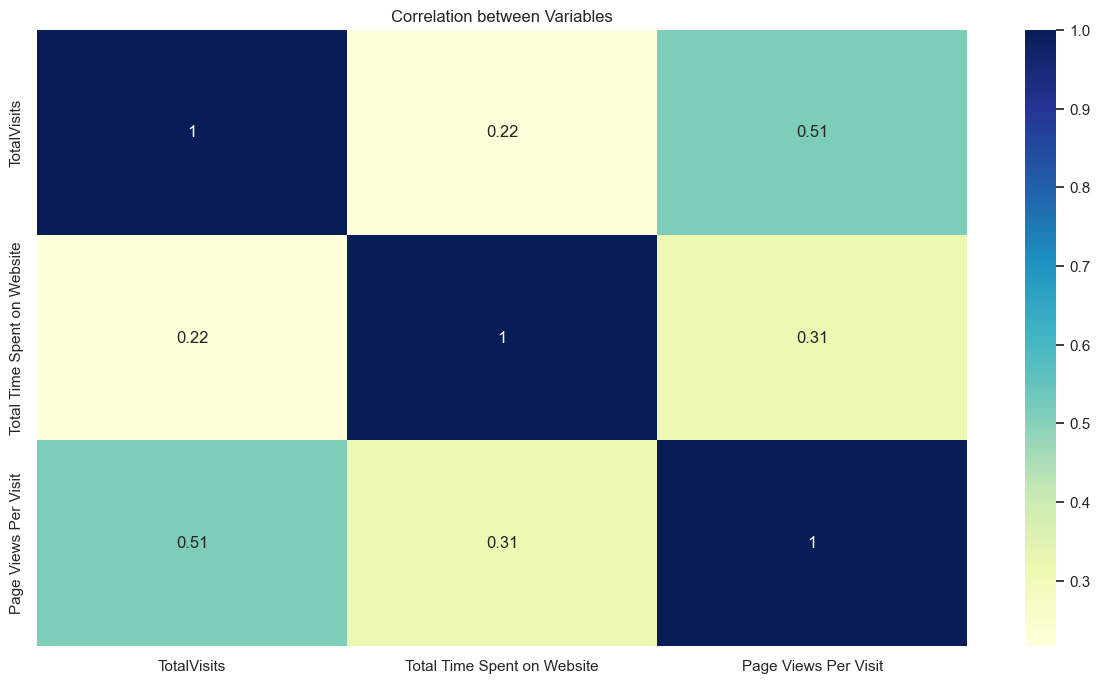

In [1343]:
#Heatmap to see correlation between variables
plt.figure(figsize=(15, 8))
sns.heatmap(leads[num_col].corr() , annot = True, cmap='YlGnBu')
plt.title("Correlation between Variables")
plt.show()

##### Numeric Feature vs. Target

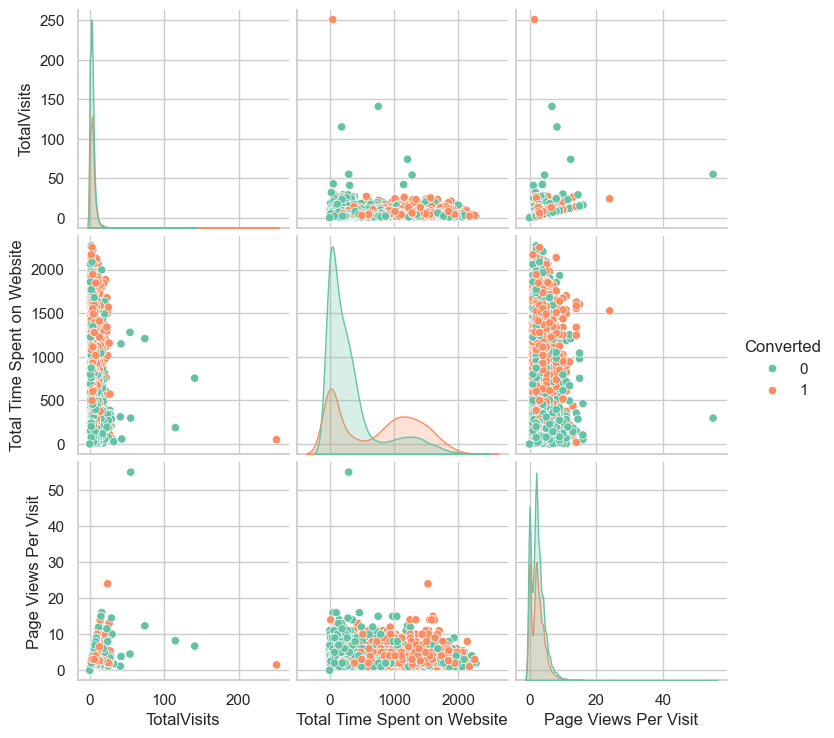

In [1344]:
# Pair plot for numeric variables with hue based on 'Converted'
sns.pairplot(leads, vars=num_col, hue='Converted', palette='Set2')
plt.show()


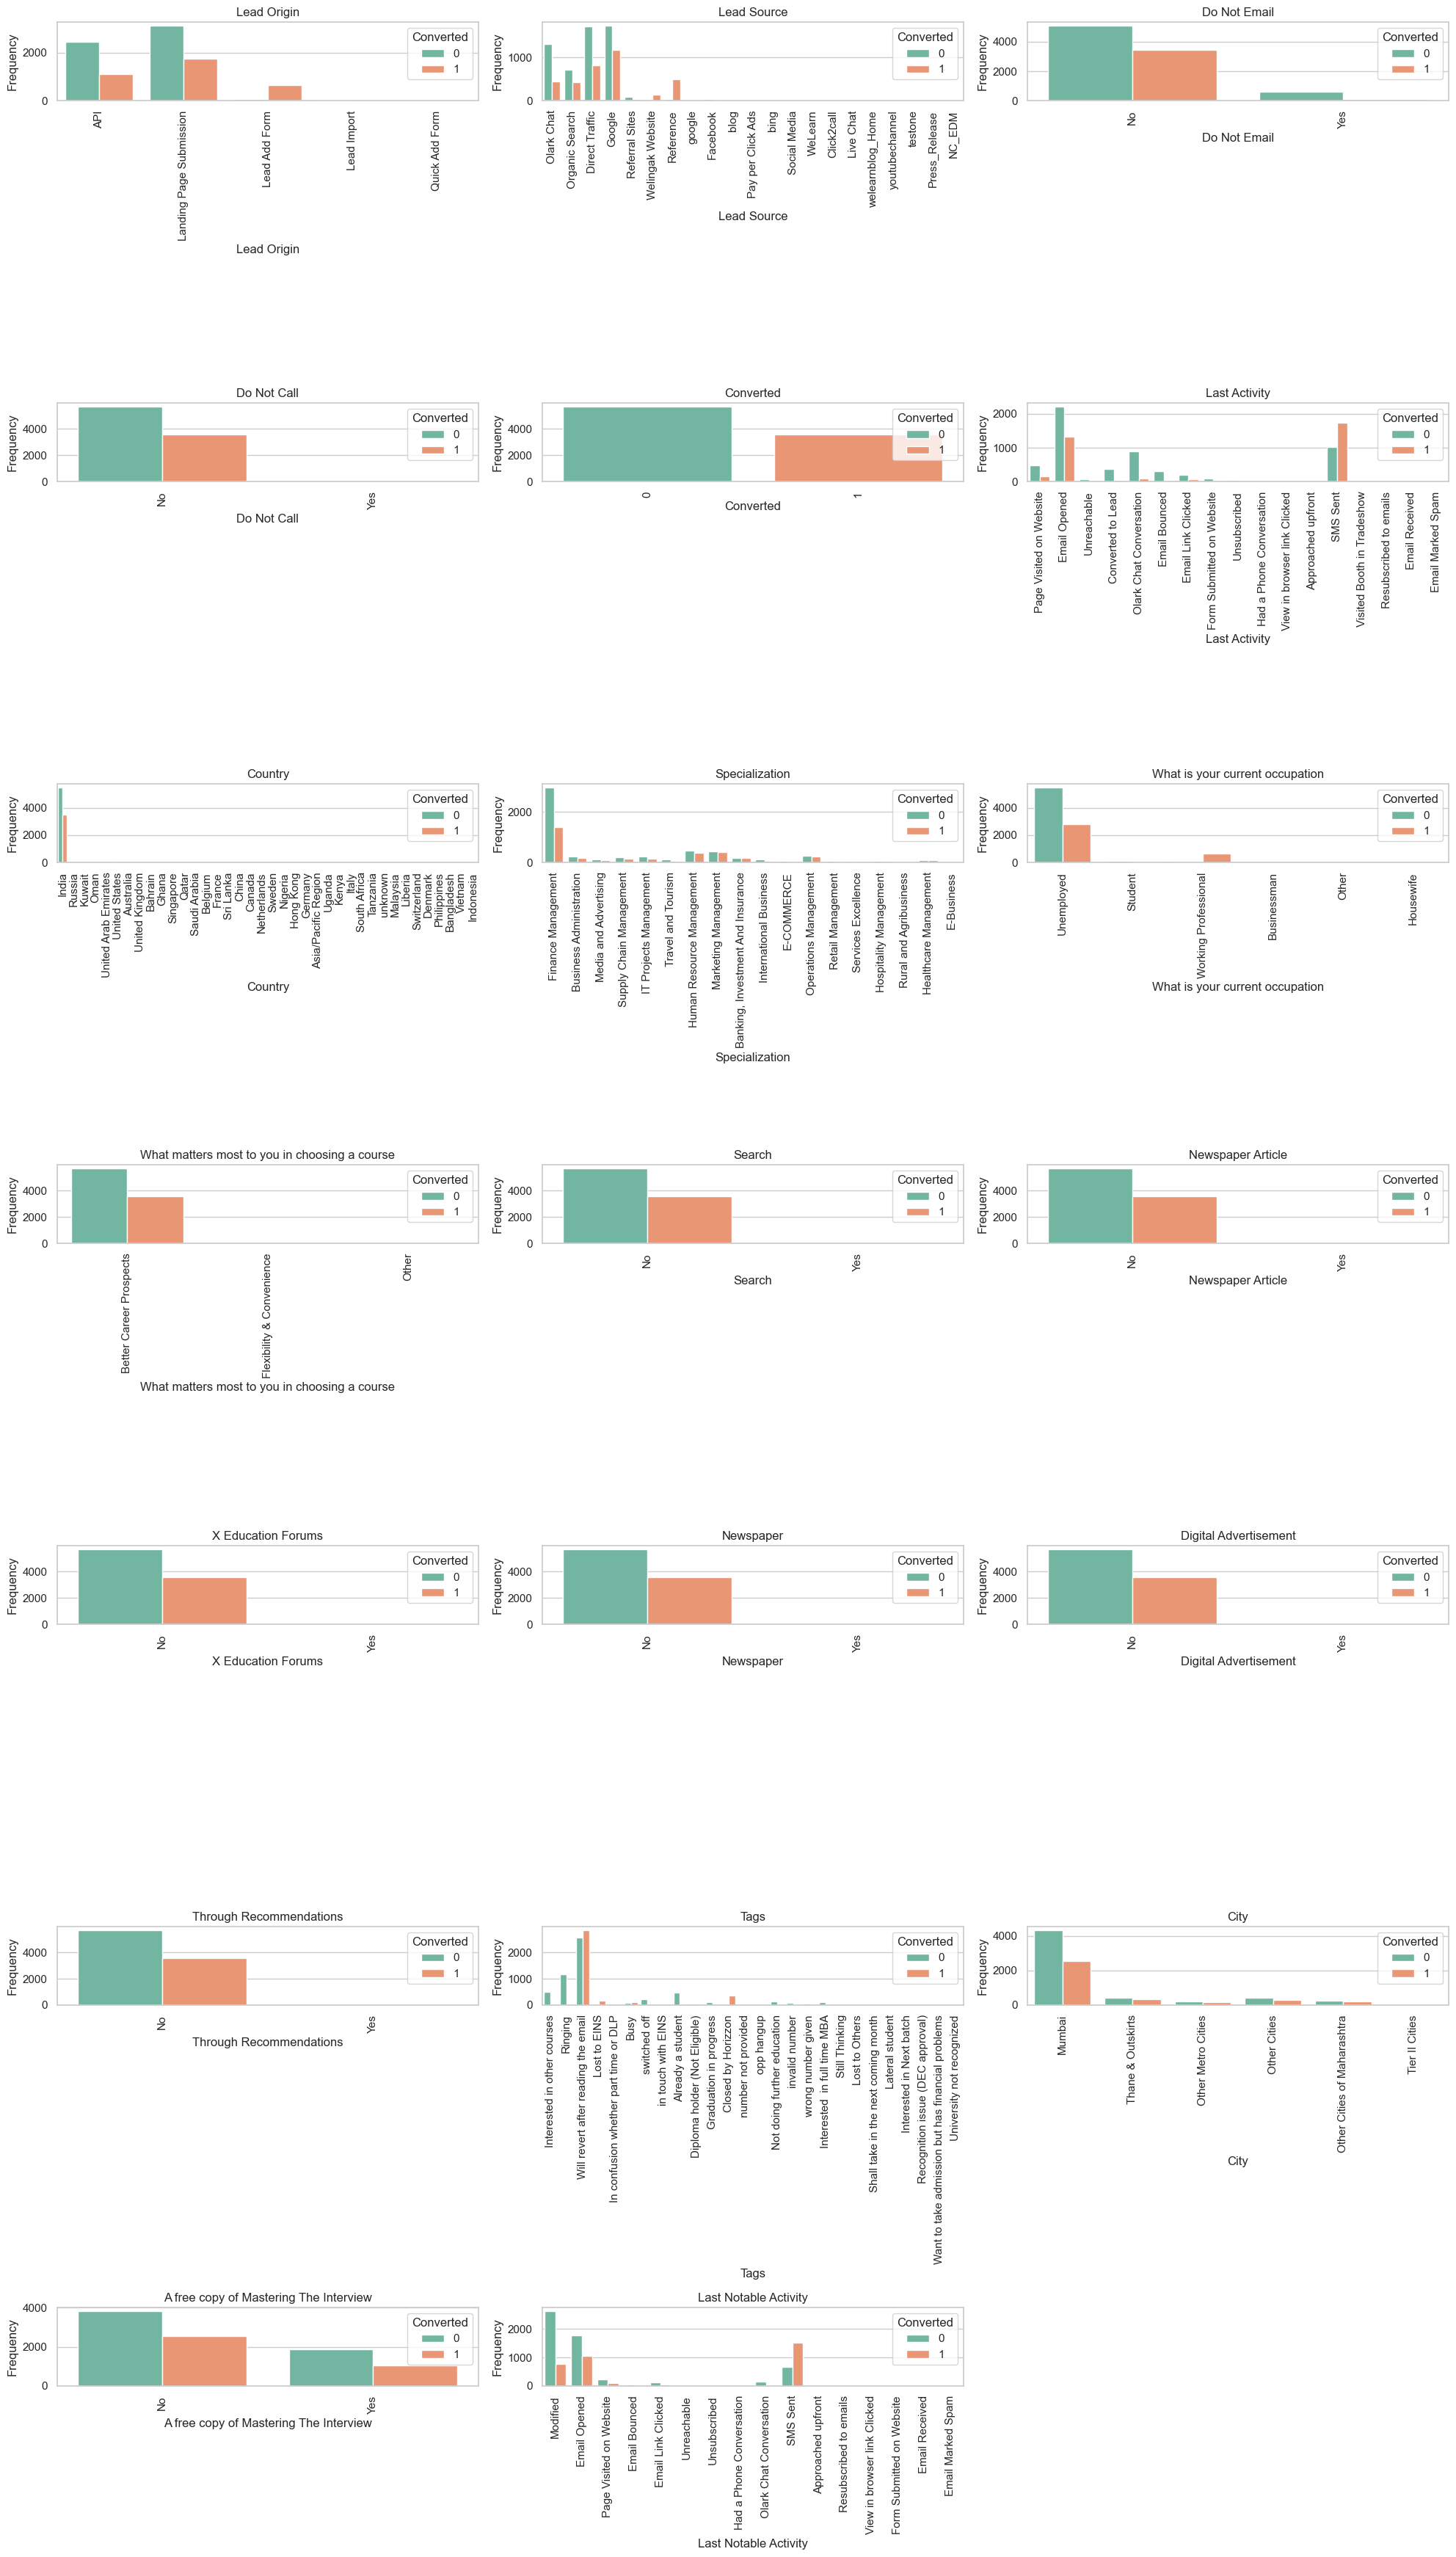

In [1345]:
# Calculate the number of rows needed
num_rows = -(-len(cat_col) // 3)  # Round up division

# Initialize variables
n = 1

# Create a new figure and set its size
plt.figure(figsize=(20, 5 * num_rows))

# Iterate through categorical variables and create count plots
for i in cat_col:
    plt.subplot(num_rows, 3, n)
    sns.countplot(x=i, hue='Converted', data=leads, palette='Set2')
    plt.title(i)  # Add the variable name as the title
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')

    n += 1

    # Break the loop if we have created all the plots
    if n > len(cat_col):
        break

plt.tight_layout()
plt.show()


In [1346]:
# Dropping Imbalance column from the data set 

imbalance_col = ['Do Not Call','Country','Search','Newspaper Article','X Education Forums','Newspaper',
                  'Digital Advertisement', 'Through Recommendations','What matters most to you in choosing a course']
leads = leads.drop(imbalance_col,axis =1)

In [1347]:
# Since the 'imbalance_col' column will be stored in cat_col too, we will drop it from that as well.
if imbalance_col in cat_col:
    cat_col.remove(imbalance_col)

In [1348]:
# Looking into the data set again
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Interested in other courses,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Ringing,Mumbai,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Mumbai,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Will revert after reading the email,Mumbai,No,Modified


In [1349]:
leads.shape

(9240, 14)

In [1350]:
# Creating dummy variables for the categorical variables and droppong the first one
binary_cols = [col for col in leads.columns if leads[col].nunique() <= 2 and leads[col].dtype == 'object']
print(binary_cols)
print(len(binary_cols))


['Do Not Email', 'A free copy of Mastering The Interview']
2


In [1351]:
#Creating a Map function
def fmap(x):
    return x.map({'Yes':1,'No':0})

In [1352]:
# Mapping into binary values
leads[binary_cols]=leads[binary_cols].apply(fmap)

##### Creating Dummies and Concat with original dataset

We have 'binary_cols' and 'cat_col' for which we have to create dummies, and these two lists will have some common columns in them as all the 'binary_cols' created are categorical columns and will be present in them.


In [1353]:
cat_col = []

for col in leads.columns:
    if leads[col].dtype == 'object' or leads[col].dtype == 'O':
        cat_col.append(col)

    else:
        pass

print("Categorical columns:", cat_col)

Categorical columns: ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']


In [1354]:
# Remove categorical columns that are already present in binary columns
cat_col = [col for col in cat_col if col not in binary_cols]

In [1356]:
# Shape before dummy creation
leads.shape

(9240, 14)

In [1357]:
# Creating dummies for categorical columns
cat_dummies = pd.get_dummies(leads[cat_col], drop_first=True).astype(int)

In [1358]:
# Concatenating dummies with the original dataset
leads = pd.concat([leads, cat_dummies], axis=1)

In [1359]:
# Dropping original categorical columns
leads = leads.drop(cat_col, axis=1)

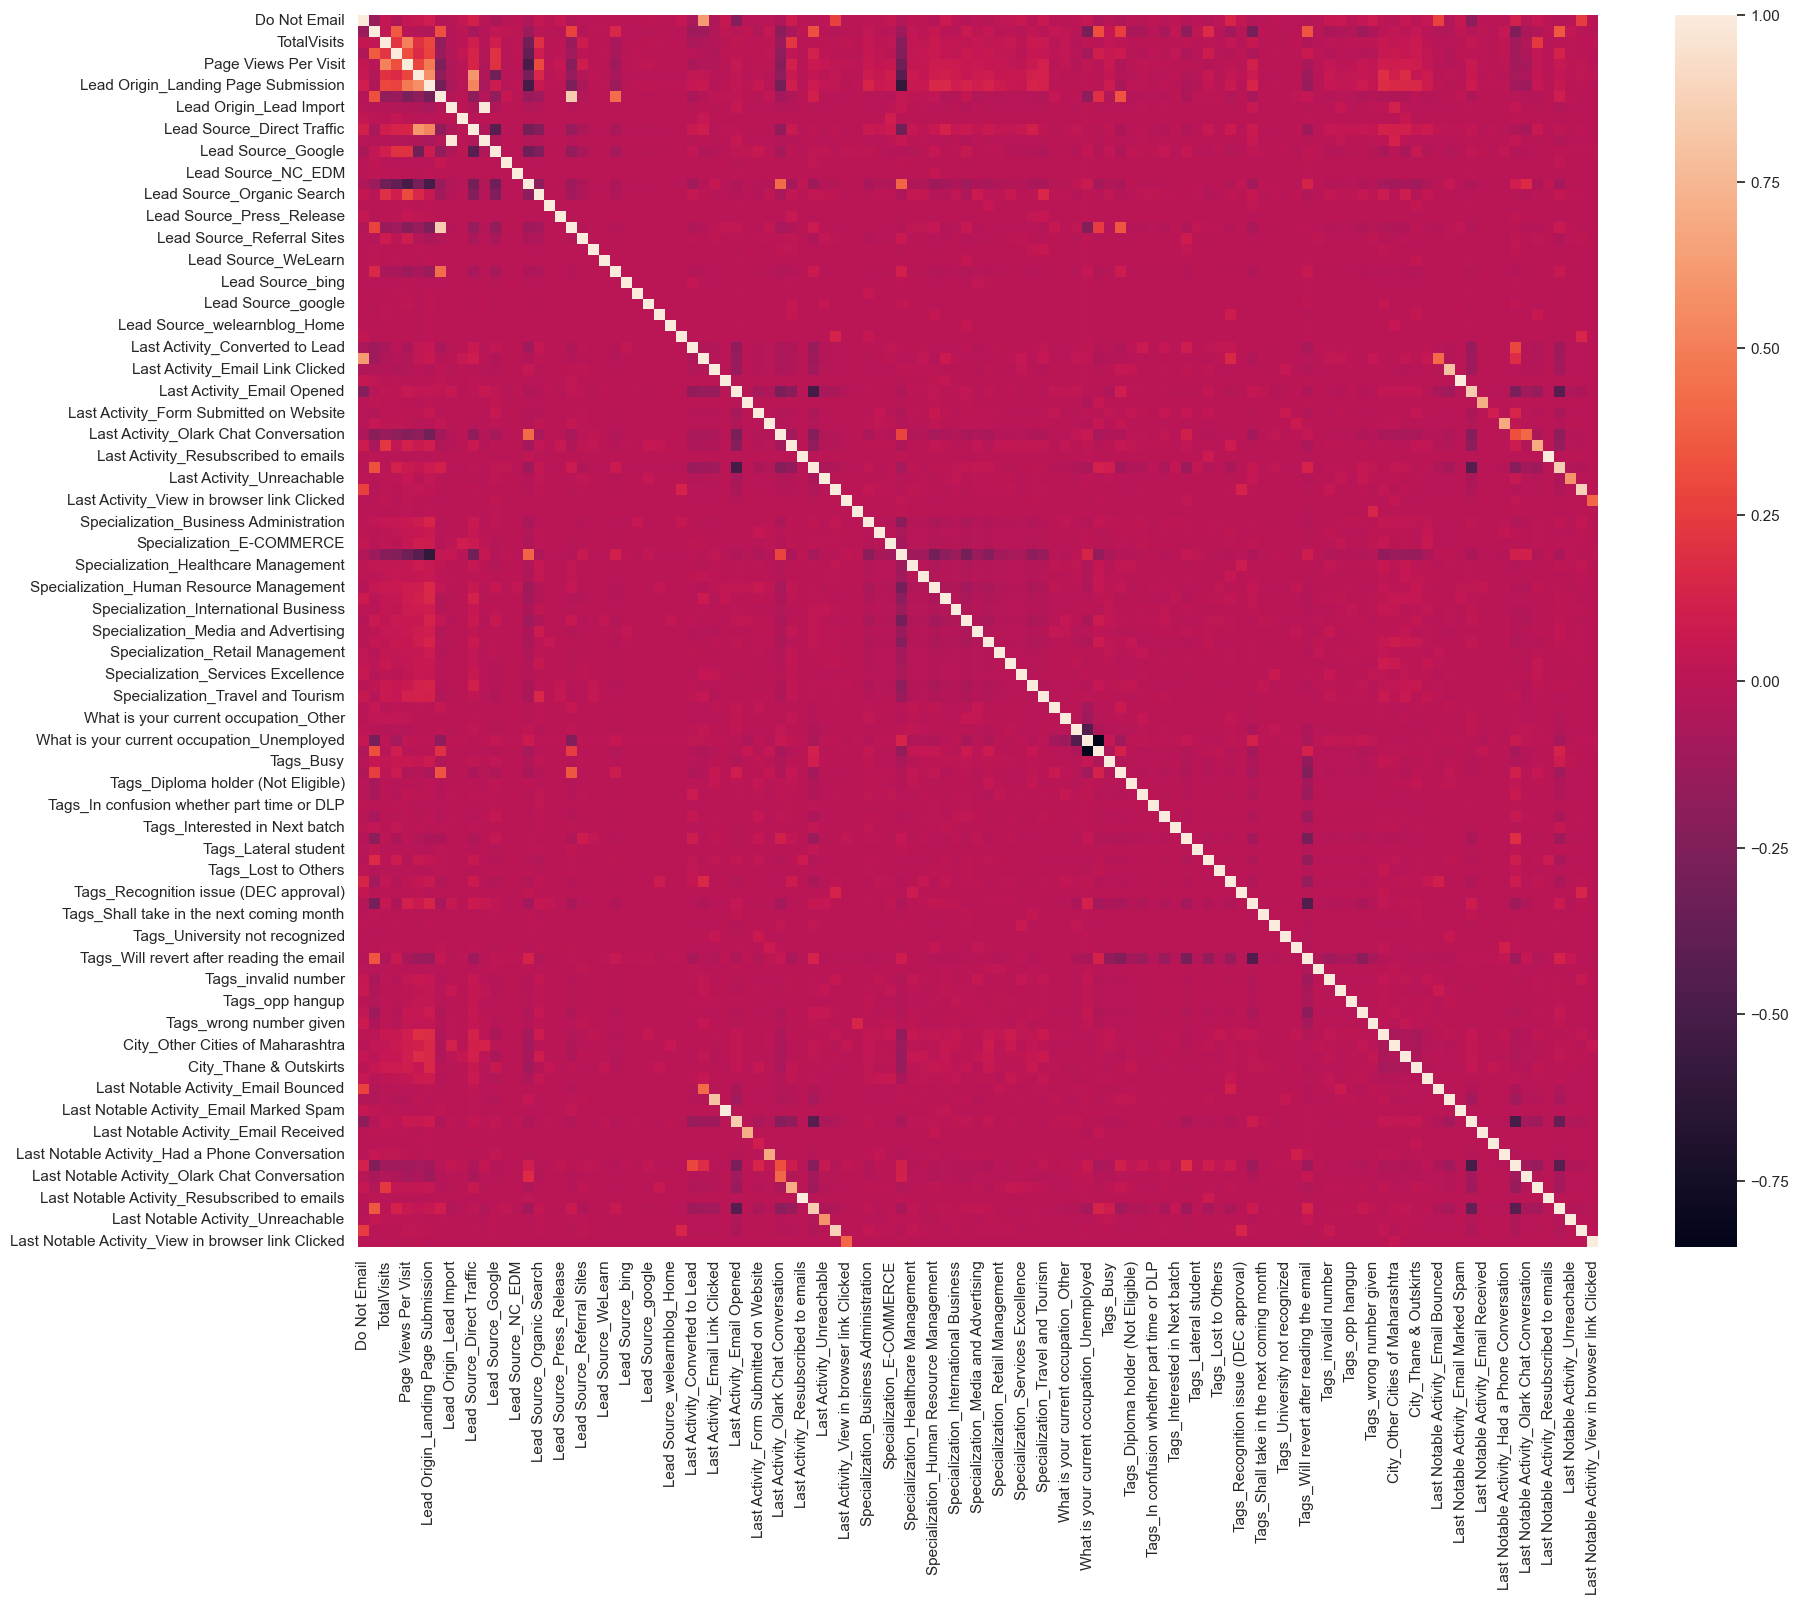

In [1360]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,16)) 
sns.heatmap(leads.corr())
plt.show()

- This head map is not readable and does not give any insights. We will make a function to drop highly correlated positive or negative columns.


##### Removing Highly correlated Features

In [1361]:

def remove_highly_correlated_features_inplace(data, threshold=0.7):
    # Calculate correlation matrix
    corr_matrix = data.corr().abs()

    # Select upper triangle of correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape, dtype=bool), k=1))

    # Find features with correlation above the threshold
    correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

    # Create dictionaries to store positively and negatively correlated features
    pos_corr_features = {}
    neg_corr_features = {}

    # Iterate through correlated features to segregate based on correlation type
    for feature in correlated_features:
        correlated_vals = upper_triangle[feature][upper_triangle[feature] > threshold]
        for col, corr_val in correlated_vals.items():
            if corr_val > 0:  # Positive correlation
                if feature not in pos_corr_features:
                    pos_corr_features[feature] = [col]
                else:
                    pos_corr_features[feature].append(col)
            elif corr_val < 0:  # Negative correlation
                if feature not in neg_corr_features:
                    neg_corr_features[feature] = [col]
                else:
                    neg_corr_features[feature].append(col)

    # Remove highly correlated features from the original DataFrame
    data.drop(correlated_features, axis=1, inplace=True)

    # Return positively and negatively correlated features
    return pos_corr_features, neg_corr_features

# Use of function
threshold = 0.7
pos_corr, neg_corr = remove_highly_correlated_features_inplace(leads, threshold)


In [1362]:
# Looking into data set
leads.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1

In [1363]:
leads.shape

(9240, 103)

#### Splitting into train and test

In [1364]:
# Importing lib
import sklearn
from sklearn.model_selection import train_test_split

In [1365]:
# Creating train and test data set 

df_train , df_test =train_test_split(leads,train_size=0.7,random_state=100)
print(df_test.shape)
print(df_train.shape)

(2772, 103)
(6468, 103)


In [1366]:
y_train = df_train.pop('Converted')
X_train = df_train

#### Rescaling the features

In [1367]:
# Importing lib 
from sklearn.preprocessing import StandardScaler

In [1368]:
scale = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()     

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
1871,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.100767,0.005716,-0.470569,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3516,0,0.290067,-0.691418,0.070401,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.290067,1.365219,1.226321,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,

In [1369]:
# description of num_vars
df_train[num_col].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.468000e+03,6.468000e+03,6.468000e+03
mean,3.295653e-17,-6.701161e-17,-1.428116e-17
std,1.000077e+00,1.000077e+00,1.000077e+00
min,-6.564336e-01,-8.853708e-01,-1.085519e+00
25%,-4.671335e-01,-8.634138e-01,-6.231508e-01
50%,-8.853323e-02,-4.352528e-01,-1.607829e-01
75%,2.900670e-01,8.098906e-01,3.015850e-01
max,4.685790e+01,3.271816e+00,2.434472e+01


#### Building Model : Feature Selection

In [1370]:
# Importing lib for model building 
import statsmodels.api as sm

In [1371]:
logreg = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
result = logreg.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6367
Model Family:                Binomial   Df Model:                          100
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1648.5
Date:                Fri, 17 Nov 2023   Deviance:                       3296.9
Time:                        19:52:41   Pearson chi2:                 1.61e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5594
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                     20.2375   7.23e+04      0.000      1.000   -1.42e+05    1.42e+05
Do Not Email                                              -1.2506      0.271     -4.612      0.000      -1.782      -0.719
TotalVisits                                                0.1471      0.037      3.957      0.000       0.074       0.220
Total Time Spent on Website                                1.1495      0.054     21.094      0.000       1.043       1.256
Page Views Per Visit                                      -0.0676      0.063     -1.067      0.286      -0.192       0.057
A free copy of Mastering The Interview                    -0.2631      0.146     -1.798      0.072      -0.550       0.024
Lead Origin_Landing Page Submission                       -0.4893      0.154     -3.183      0.001      -0.791      -0.188
Lead Origin_Lead Add Form                                  3.3016      0.723      4.567      0.000       1.885       4.719
Lead Origin_Lead Import                                    0.2546      0.960      0.265      0.791      -1.626       2.136
Lead Origin_Quick Add Form                                24.6561   2.17e+05      0.000      1.000   -4.26e+05    4.26e+05
Lead Source_Direct Traffic                                 0.2331      0.765      0.305      0.761      -1.267       1.733
Lead Source_Google                                         0.3476      0.749      0.464      0.643      -1.121       1.816
Lead Source_Live Chat                                     22.1211   1.52e+05      0.000      1.000   -2.97e+05    2.97e+05
Lead Source_NC_EDM                                        25.2441   2.19e+05      0.000      1.000    -4.3e+05     4.3e+05
Lead Source_Olark Chat                                     0.9738      0.766      1.272      0.203      -0.527       2.474
Lead Source_Organic Search                                 0.3817      0.769      0.496      0.620      -1.126       1.890
Lead Source_Pay per Click Ads                            -19.4632   2.14e+05  -9.09e-05      1.000    -4.2e+05     4.2e+05
Lead Source_Press_Release                                -22.1048   1.22e+05     -0.000      1.000    -2.4e+05     2.4e+05
Lead Source_Referral Sites                                 0.3058      0.830      0.369      0.712      -1.320       1.932
Lead Source_Social Media                                   3.8269      2.864      1.336      0.182      -1.787       9.441
Lead Source_WeLearn                                       24.5256   2.17e+05      0.000      1.000   -4.26e+05    4.26e+05
Lead Source_Welingak Website                               1.7404      0.790      2.203      0.028       0.192       3.289
Lead Sou

#### Feature Selection Using RFE

In [1372]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1373]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15) 
rfe = rfe.fit(X_train, y_train)

In [1374]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False, False, False, False,  True, False,
        True,  True, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False])

In [1375]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 6),
 ('TotalVisits', False, 66),
 ('Total Time Spent on Website', False, 9),
 ('Page Views Per Visit', False, 76),
 ('A free copy of Mastering The Interview', False, 46),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 61),
 ('Lead Origin_Quick Add Form', False, 49),
 ('Lead Source_Direct Traffic', False, 56),
 ('Lead Source_Google', False, 62),
 ('Lead Source_Live Chat', False, 77),
 ('Lead Source_NC_EDM', False, 41),
 ('Lead Source_Olark Chat', False, 28),
 ('Lead Source_Organic Search', False, 64),
 ('Lead Source_Pay per Click Ads', False, 85),
 ('Lead Source_Press_Release', False, 60),
 ('Lead Source_Referral Sites', False, 63),
 ('Lead Source_Social Media', False, 27),
 ('Lead Source_WeLearn', False, 55),
 ('Lead Source_Welingak Website', False, 5),
 ('Lead Source_bing', False, 81),
 ('Lead Source_blog', False, 32),
 ('Lead Source_google', False, 33),
 ('Lead Source_testone',

In [1376]:
col = X_train.columns[rfe.support_]

In [1377]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_Welingak Website',
       'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
       'Lead Source_youtubechannel', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Receiv

##### Assessing the model with StatsModels

#### Model 1 

In [1379]:
LR = sm.GLM(y_train,(sm.add_constant(X_train[col])),family=sm.families.Binomial())
res = LR.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2071.4
Date:                Fri, 17 Nov 2023   Deviance:                       4142.8
Time:                        19:53:59   Pearson chi2:                 1.36e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4978
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6114      0.273     -2.243      0.025      -1.146      -0.077
Lead Origin_Lead Add Form                         2.5286      0.218     11.591      0.000       2.101       2.956
Last Activity_Had a Phone Conversation            2.5475      0.739      3.447      0.001       1.099       3.996
Last Activity_SMS Sent                            1.8672      0.088     21.130      0.000       1.694       2.040
What is your current occupation_Student          -1.7924      0.377     -4.756      0.000      -2.531      -1.054
What is your current occupation_Unemployed       -3.0511      0.224    -13.636      0.000      -3.490      -2.613
Tags_Busy                                         2.9116      0.286     10.172      0.000       2.351       3.473
Tags_Closed by Horizzon                           9.4339      1.029      9.169      0.000       7.417      11.451
Tags_Interested in Next batch                    24.0797   2.07e+04      0.001      0.999   -4.06e+04    4.06e+04
Tags_Lateral student                             25.4488    2.4e+04      0.001      0.999    -4.7e+04    4.71e+04
Tags_Lost to EINS                                 8.7396      0.749     11.674      0.000       7.272      10.207
Tags_Ringing                                     -1.0964      0.298     -3.683      0.000      -1.680      -0.513
Tags_Will revert after reading the email          3.4128      0.201     16.944      0.000       3.018       3.808
Tags_switched off                                -1.3072      0.549     -2.379      0.017      -2.384      -0.230
Last Notable Activity_Modified                   -1.7818      0.090    -19.797      0.000      -1.958      -1.605
Last Notable Activity_Olark Chat Conversation    -1.6667      0.319     -5.226      0.000      -2.292      -1.042
=================================================================================================================
"""

In [1380]:
#Calculate VIF of the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif.sort_values(by = 'VIF',ascending = False)

,Features,VIF
4,What is your current occupation_Unemployed,4.85
11,Tags_Will revert after reading the email,3.39
13,Last Notable Activity_Modified,1.71
10,Tags_Ringing,1.67
2,Last Activity_SMS Sent,1.60
6,Tags_Closed by Horizzon,1.30
0,Lead Origin_Lead Add Form,1.29
12,Tags_switched off,1.15
5,Tags_Busy,1.12
9,Tags_Lost to EINS,1.07


<b> The P value of 'Tags_Interested in Next batch' is more than 0.05, so we will drop it and rebuild the model.</b>


In [1381]:
# Dropping 'Tags_Interested in Next batch' in place
col = col.drop('Tags_Interested in Next batch')

#### Model 2

In [1382]:
LR2 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family = sm.families.Binomial())
res = LR2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2079.3
Date:                Fri, 17 Nov 2023   Deviance:                       4158.6
Time:                        19:55:52   Pearson chi2:                 1.36e+04
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4966
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.5031      0.265     -1.899      0.058      -1.022       0.016
Lead Origin_Lead Add Form                         2.5396      0.217     11.678      0.000       2.113       2.966
Last Activity_Had a Phone Conversation            2.5406      0.735      3.458      0.001       1.101       3.981
Last Activity_SMS Sent                            1.8862      0.088     21.357      0.000       1.713       2.059
What is your current occupation_Student          -1.8123      0.372     -4.868      0.000      -2.542      -1.083
What is your current occupation_Unemployed       -3.0285      0.221    -13.677      0.000      -3.462      -2.595
Tags_Busy                                         2.7706      0.278      9.961      0.000       2.225       3.316
Tags_Closed by Horizzon                           9.3091      1.027      9.066      0.000       7.297      11.321
Tags_Lateral student                             24.3048   1.45e+04      0.002      0.999   -2.85e+04    2.85e+04
Tags_Lost to EINS                                 8.6150      0.746     11.554      0.000       7.154      10.076
Tags_Ringing                                     -1.2433      0.290     -4.292      0.000      -1.811      -0.676
Tags_Will revert after reading the email          3.2797      0.190     17.289      0.000       2.908       3.652
Tags_switched off                                -1.4514      0.545     -2.663      0.008      -2.520      -0.383
Last Notable Activity_Modified                   -1.7896      0.090    -19.892      0.000      -1.966      -1.613
Last Notable Activity_Olark Chat Conversation    -1.6659      0.319     -5.226      0.000      -2.291      -1.041
=================================================================================================================
"""

In [1383]:
#checking vif values
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
4,What is your current occupation_Unemployed,4.833576
10,Tags_Will revert after reading the email,3.375013
12,Last Notable Activity_Modified,1.709495
9,Tags_Ringing,1.669584
2,Last Activity_SMS Sent,1.590460
6,Tags_Closed by Horizzon,1.297673
0,Lead Origin_Lead Add Form,1.293937
11,Tags_switched off,1.145665
5,Tags_Busy,1.118323
8,Tags_Lost to EINS,1.072462


<b> The P value of 'Tags_Lateral student' is more than 0.05, so we will drop it and rebuild the model.</b>


In [1384]:
# Dropping 'Tags_Lateral student' in place
col = col.drop("Tags_Lateral student")

#### Model 3

In [1385]:
LR3 = sm.GLM(y_train,(sm.add_constant(X_train[col])),family = sm.families.Binomial())
res = LR3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2086.5
Date:                Fri, 17 Nov 2023   Deviance:                       4173.0
Time:                        19:57:57   Pearson chi2:                 1.35e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4955
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.4506      0.261     -1.725      0.085      -0.963       0.061
Lead Origin_Lead Add Form                         2.5465      0.217     11.748      0.000       2.122       2.971
Last Activity_Had a Phone Conversation            2.5326      0.732      3.460      0.001       1.098       3.967
Last Activity_SMS Sent                            1.8958      0.088     21.496      0.000       1.723       2.069
What is your current occupation_Student          -1.8218      0.370     -4.929      0.000      -2.546      -1.097
What is your current occupation_Unemployed       -3.0123      0.220    -13.692      0.000      -3.444      -2.581
Tags_Busy                                         2.6946      0.274      9.819      0.000       2.157       3.232
Tags_Closed by Horizzon                           9.2306      1.026      8.999      0.000       7.220      11.241
Tags_Lost to EINS                                 8.5367      0.744     11.471      0.000       7.078       9.995
Tags_Ringing                                     -1.3207      0.286     -4.617      0.000      -1.881      -0.760
Tags_Will revert after reading the email          3.2059      0.184     17.407      0.000       2.845       3.567
Tags_switched off                                -1.5270      0.543     -2.811      0.005      -2.592      -0.462
Last Notable Activity_Modified                   -1.7789      0.090    -19.826      0.000      -1.955      -1.603
Last Notable Activity_Olark Chat Conversation    -1.6614      0.319     -5.214      0.000      -2.286      -1.037
=================================================================================================================
"""

In [1386]:
#checking vif values
vif = pd.DataFrame()
X = X_train[col]
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif.sort_values(by ='VIF', ascending = False)

,Features,VIF
4,What is your current occupation_Unemployed,4.828048
9,Tags_Will revert after reading the email,3.365945
11,Last Notable Activity_Modified,1.709158
8,Tags_Ringing,1.667562
2,Last Activity_SMS Sent,1.587266
6,Tags_Closed by Horizzon,1.296926
0,Lead Origin_Lead Add Form,1.293144
10,Tags_switched off,1.145197
5,Tags_Busy,1.117914
7,Tags_Lost to EINS,1.072203


Since none of the variance inflation factors (VIFs) exceed 5 and considering that none of the variables exhibit significant p-values (> 0.05) in the summary, we can safely determine that this constitutes our ultimate model.

#### Making Predictions on the Train Set

In [1387]:
# Getting the predicted values on the train set
X_train_sm = sm.add_constant(X_train[col])
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.008296
6795    0.436084
3516    0.008296
8105    0.052760
3934    0.115482
4844    0.990539
3297    0.008296
8071    0.999994
987     0.115482
7423    0.837365
dtype: float64

In [1388]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.00829622, 0.43608429, 0.00829622, 0.05275973, 0.11548192,
       0.99053893, 0.00829622, 0.99999433, 0.11548192, 0.83736485])

In [1389]:
#Creating a dataframe with the actual and the predicted probabilities

y_train_pred_final = pd.DataFrame()
y_train_pred_final['Lead ID'] = y_train.index
y_train_pred_final['Converted'] = y_train.values
y_train_pred_final['Converted_prob'] = y_train_pred
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob
0,1871,0,0.008296
1,6795,0,0.436084
2,3516,0,0.008296
3,8105,0,0.052760
4,3934,0,0.115482


In [1390]:
#Creating new column 'predicted' with 1 if Probobility > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted
0,1871,0,0.008296,0
1,6795,0,0.436084,0
2,3516,0,0.008296,0
3,8105,0,0.052760,0
4,3934,0,0.115482,0


### Importing Lib 

In [1391]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [1392]:
# Confusion matrix for the target column : `converted `

confusion = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['predicted'] )
print(confusion)

[[3866  136]
 [ 761 1705]]


In [1393]:
#classification report
print(classification_report(y_train_pred_final['Converted'], y_train_pred_final['predicted'] ))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      4002
           1       0.93      0.69      0.79      2466

    accuracy                           0.86      6468
   macro avg       0.88      0.83      0.84      6468
weighted avg       0.87      0.86      0.86      6468



The classification report shows that the model has a precision of 0.83 for class 0 and 0.79 for class 1. This means that 83% of the model's predicted positive cases in class 0 are actually positive, and 79% of the model's predicted positive cases in class 1 are actually positive.

The model's recall for class 0 is 0.89 and 0.70 for class 1. This means that the model correctly predicts 89% of the actual positive cases in class 0 and 70% of the actual positive cases in class 1.

The model's F1 score for class 0 is 0.86 and 0.74 for class 1. This means that the model performs well on both classes, but it performs slightly better on class 0.

The overall accuracy of the model is 0.81. This means that the model correctly predicts 81% of the cases in the test dataset.

### Checking Other Matrix

In [1394]:
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
TP = confusion[1,1] # true positive 

In [1395]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6914030819140308

In [1396]:
# Let us calculate specificity
TN / float(TN+FP)

0.9660169915042479

In [1397]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.03398300849575212


In [1398]:
# positive predictive value 
print (TP / float(TP+FP))

0.9261271048343291


In [1399]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8355305813702183


In [1402]:
#Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(7, 7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1403]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

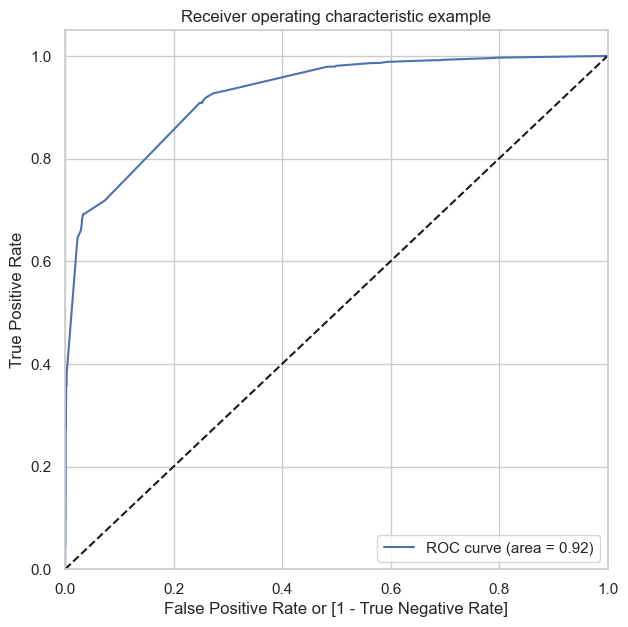

In [1404]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Looking Optimal Cut off Point

In [1405]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1871,0,0.008296,0,1,0,0,0,0,0,0,0,0,0
1,6795,0,0.436084,0,1,1,1,1,1,0,0,0,0,0
2,3516,0,0.008296,0,1,0,0,0,0,0,0,0,0,0
3,8105,0,0.052760,0,1,0,0,0,0,0,0,0,0,0
4,3934,0,0.115482,0,1,1,0,0,0,0,0,0,0,0


In [1406]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.692641  0.978913  0.516242
0.2   0.2  0.807205  0.920519  0.737381
0.3   0.3  0.807359  0.920114  0.737881
0.4   0.4  0.809988  0.908759  0.749125
0.5   0.5  0.861317  0.691403  0.966017
0.6   0.6  0.861936  0.691403  0.967016
0.7   0.7  0.858844  0.680049  0.969015
0.8   0.8  0.850649  0.645174  0.977261
0.9   0.9  0.764688  0.388483  0.996502


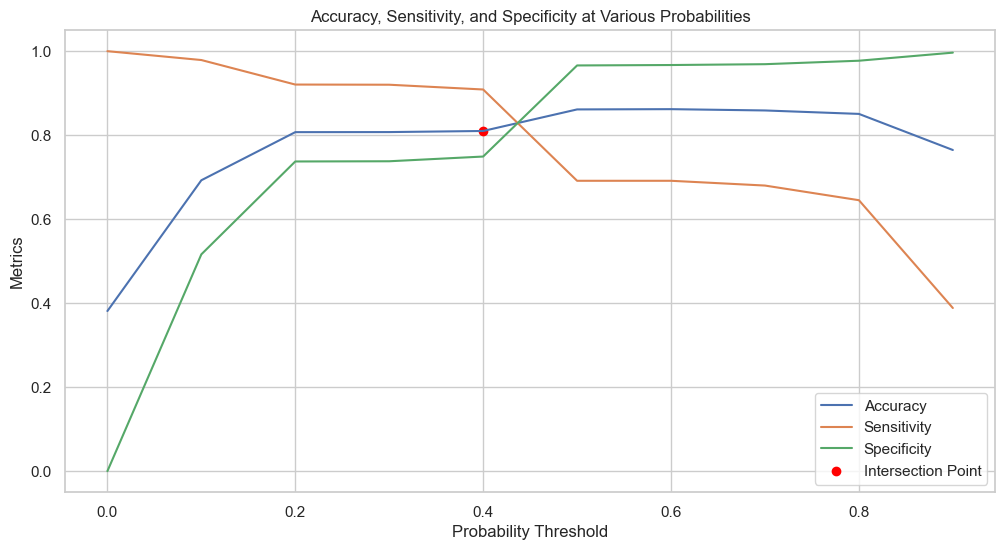

Intersection Point: (0.4, 0.8099876314162029)


In [1407]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
# Calculate the Euclidean distance between the lines
cutoff_df['distance'] = np.sqrt((cutoff_df['accuracy'] - cutoff_df['sensi'])**2 +
                                (cutoff_df['accuracy'] - cutoff_df['speci'])**2 +
                                (cutoff_df['sensi'] - cutoff_df['speci'])**2)

# Find the index where the distance is minimized
intersection_idx = cutoff_df['distance'].idxmin()

# Get the coordinates of the intersection point
intersection_point = (cutoff_df.loc[intersection_idx, 'prob'], cutoff_df.loc[intersection_idx, 'accuracy'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(cutoff_df['prob'], cutoff_df[['accuracy', 'sensi', 'speci']])
plt.scatter(*intersection_point, color='red', marker='o', label='Intersection Point')
plt.xlabel('Probability Threshold')
plt.ylabel('Metrics')
plt.legend(['Accuracy', 'Sensitivity', 'Specificity', 'Intersection Point'])
plt.title('Accuracy, Sensitivity, and Specificity at Various Probabilities')
plt.show()

print("Intersection Point:", intersection_point)

In [1408]:
#### From the curve above, 0.41 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.41 else 0)

y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1871,0,0.008296,0,1,0,0,0,0,0,0,0,0,0,0
1,6795,0,0.436084,0,1,1,1,1,1,0,0,0,0,0,1
2,3516,0,0.008296,0,1,0,0,0,0,0,0,0,0,0,0
3,8105,0,0.052760,0,1,0,0,0,0,0,0,0,0,0,0
4,3934,0,0.115482,0,1,1,0,0,0,0,0,0,0,0,0


In [1409]:
#Assigning Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Lead ID,Converted,Converted_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,1871,0,0.008296,0,1,0,0,0,0,0,0,0,0,0,0,1
1,6795,0,0.436084,0,1,1,1,1,1,0,0,0,0,0,1,44
2,3516,0,0.008296,0,1,0,0,0,0,0,0,0,0,0,0,1
3,8105,0,0.052760,0,1,0,0,0,0,0,0,0,0,0,0,5
4,3934,0,0.115482,0,1,1,0,0,0,0,0,0,0,0,0,12


In [1410]:
from sklearn.metrics import accuracy_score

In [1411]:
# Let's check the overall accuracy.
accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8098330241187384

In [1412]:
confusion2 = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2998, 1004],
       [ 226, 2240]], dtype=int64)

In [1413]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1414]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity of the logistic regression model is:  ",TP / float(TP+FN))

Sensitivity of the logistic regression model is:   0.9083536090835361


In [1415]:
# Let us calculate specificity
print("Specificity of the logistic regression model is: ",TN / float(TN+FP))

Specificity of the logistic regression model is:  0.7491254372813593


In [1416]:
# Calculate false postive rate
print("False positive rate:",FP/ float(TN+FP))

# Positive predictive value 
print("Positive Predictive rate:",TP / float(TP+FP))

# Negative predictive value
print("Negative Predictive rate:",TN / float(TN+ FN))

False positive rate: 0.25087456271864067
Positive Predictive rate: 0.6905055487053021
Negative Predictive rate: 0.9299007444168734


In [1417]:
#classification report
print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted ))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      4002
           1       0.69      0.91      0.78      2466

    accuracy                           0.81      6468
   macro avg       0.81      0.83      0.81      6468
weighted avg       0.84      0.81      0.81      6468



In [1418]:
from sklearn.metrics import precision_recall_curve

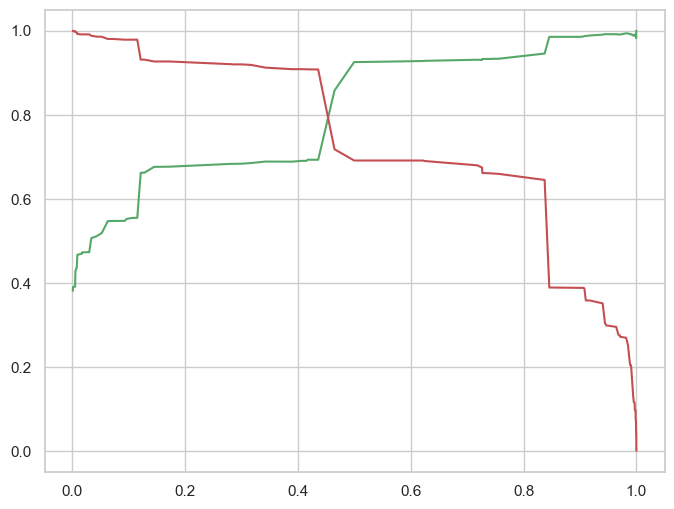

In [1419]:
##precision or recall tradeoff
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)
plt.figure(figsize = (8,6))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

At the 0.4 threshold, a balance exists between Precision and Recall. Therefore, it's prudent to categorize any Prospect Lead with a Conversion Probability exceeding 40% as a promising Lead.

### Making predictions on the test set

In [1420]:
y_test = df_test.pop('Converted')
X_test = df_test

In [1421]:
#Making predictions on the test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scale.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked
4269,0,0.857967,0.964504,2.613424,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2376,0,-0.656434,-0.885371,-1.085519,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7766,0,0.290067,-0.777416,1.226321,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
9199,0,-0.656434,-0.885371,-1.085519,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [1422]:
X_test = X_test[col]
X_test.head()

,Lead Origin_Lead Add Form,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4269,0,0,1,0,1,0,0,0,0,1,0,0,0
2376,1,0,1,0,1,0,0,0,0,1,0,0,0
7766,0,0,0,0,0,0,0,0,0,1,0,0,0
9199,0,0,0,0,1,0,0,0,0,0,0,1,0
4359,1,0,0,0,1,0,0,0,0,1,0,0,0


In [1423]:
#Adding constant
X_test_sm = sm.add_constant(X_test)

In [1424]:
#Making Predicition on test set
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

4269    0.837365
2376    0.985010
7766    0.940209
9199    0.005263
4359    0.907999
9186    0.837365
1631    0.436084
8963    0.436084
8007    0.115482
5324    0.837365
dtype: float64

In [1425]:
# Converting y_pred to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)

In [1426]:
# Let's see the head
y_pred_df.head()

,0
4269,0.837365
2376,0.985010
7766,0.940209
9199,0.005263
4359,0.907999


In [1427]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Lead ID'] = y_test_df.index

In [1428]:
# Removing index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1429]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
y_pred_final.head()

,Converted,Lead ID,0
0,1,4269,0.837365
1,1,2376,0.985010
2,1,7766,0.940209
3,0,9199,0.005263
4,1,4359,0.907999


In [1430]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [1431]:
# Rearranging the columns
desired_order = ['Lead ID', 'Converted', 'Converted_prob']
y_pred_final = y_pred_final.reindex(columns=desired_order)


In [1432]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead ID,Converted,Converted_prob
0,4269,1,0.837365
1,2376,1,0.985010
2,7766,1,0.940209
3,9199,0,0.005263
4,4359,1,0.907999


In [1433]:
# Creating new column "Lead Score" with 1to100 using conversion rates
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))
# Let's see the head
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score
0,4269,1,0.837365,84
1,2376,1,0.985010,99
2,7766,1,0.940209,94
3,9199,0,0.005263,1
4,4359,1,0.907999,91


In [1434]:
#Taking 0.4 as the cutoff using precision recall tradeoff
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.4 else 0)

In [1435]:
y_pred_final.head()

,Lead ID,Converted,Converted_prob,Lead_Score,final_predicted
0,4269,1,0.837365,84,1
1,2376,1,0.985010,99,1
2,7766,1,0.940209,94,1
3,9199,0,0.005263,1,0
4,4359,1,0.907999,91,1


In [1436]:
# Let's check the overall accuracy.
print("Model Accuracy on Test data is ",accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted))

Model Accuracy on Test data is  0.8059163059163059


In [1437]:
confusion2 = confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1238,  439],
       [  99,  996]], dtype=int64)

In [1438]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1439]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity of the model on test data is:",TP / float(TP+FN))

Sensitivity of the model on test data is: 0.9095890410958904


In [1440]:
# Let us calculate specificity
print("Specificity of the model on test data is:",TN / float(TN+FP))

Specificity of the model on test data is: 0.7382230172927847


In [1441]:
#classification report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.93      0.74      0.82      1677
           1       0.69      0.91      0.79      1095

    accuracy                           0.81      2772
   macro avg       0.81      0.82      0.80      2772
weighted avg       0.83      0.81      0.81      2772

